In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Try loading the dataset with a different encoding
df = pd.read_csv(r'E:\New folder\Amazon Sale Report.csv', encoding='ISO-8859-1')


In [7]:
# Display the first few rows of the dataset
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [9]:
# Get an overview of the dataset (data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [13]:
# Summary statistics for numerical columns
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [15]:
#Drop irrelevent columns
df.drop(columns=['New', 'PendingS'], inplace=True)

In [27]:
# Filling missing 'Amount' with 0
df['Amount'] = df['Amount'].fillna(0)


In [29]:
# Filling missing 'currency' with 'Unknown'
df['currency'] = df['currency'].fillna('Unknown')


In [33]:
# Drop rows with missing shipping details
df['Amount'] = df['Amount'].fillna(0)
df['ship-city'] = df['ship-city'].fillna('Unknown City')
df['ship-state'] = df['ship-state'].fillna('Unknown State')
df['ship-country'] = df['ship-country'].fillna('Unknown Country')


In [37]:
df['Date'].head(10)


0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
5   2022-04-30
6   2022-04-30
7   2022-04-30
8   2022-04-30
9   2022-04-30
Name: Date, dtype: datetime64[ns]

In [39]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


In [41]:
print(df['Category'].unique())
print(df['Sales Channel'].unique())
print(df['Status'].unique())


['T-shirt' 'Shirt' 'Blazzer' 'Trousers' 'Perfume' 'Socks' 'Shoes' 'Wallet'
 'Watch']
['Amazon.in' 'Non-Amazon']
['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']


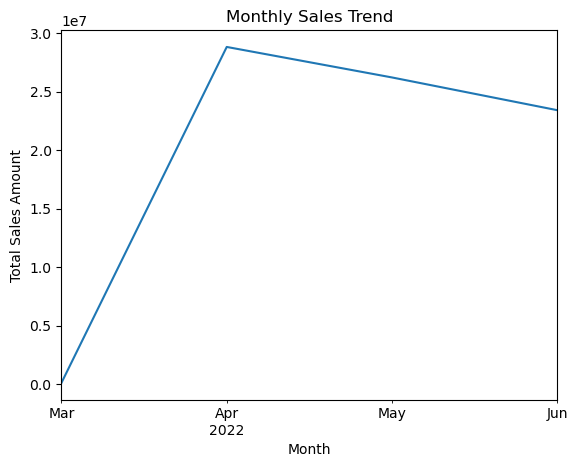

In [43]:
#Sales trends over time
df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()


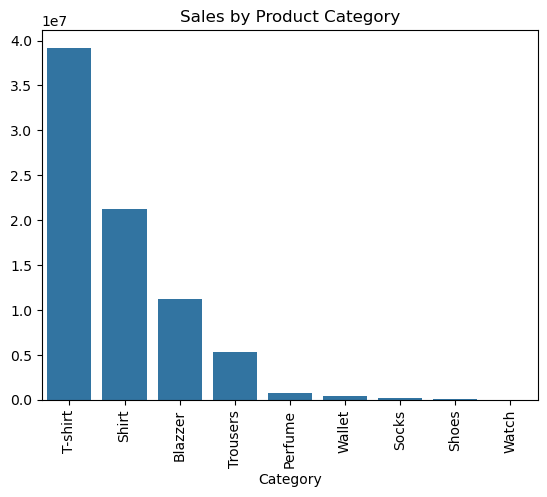

In [45]:
#Sales by Category
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Product Category')
plt.xticks(rotation=90)
plt.show()


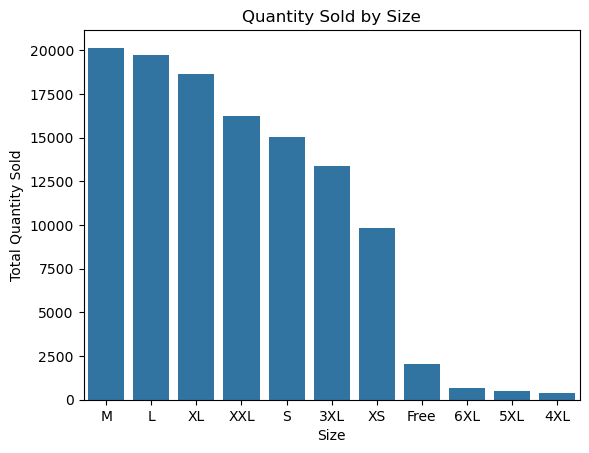

In [47]:
#Product Analysis (Quantity sold by size)
size_sales = df.groupby('Size')['Qty'].sum().sort_values(ascending=False)
sns.barplot(x=size_sales.index, y=size_sales.values)
plt.title('Quantity Sold by Size')
plt.xlabel('Size')
plt.ylabel('Total Quantity Sold')
plt.show()


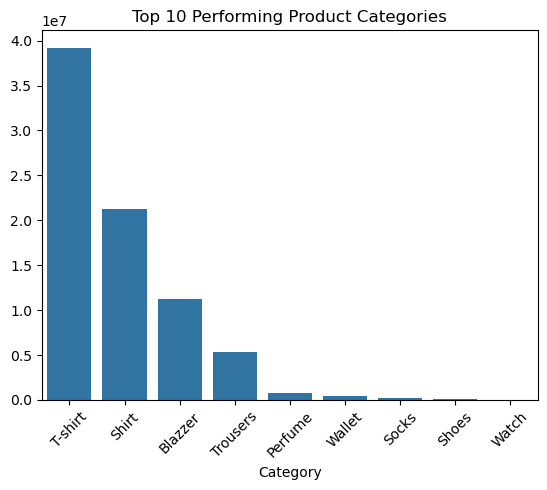

In [49]:
#Top performancing products
top_products = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Performing Product Categories')
plt.xticks(rotation=45)
plt.show()


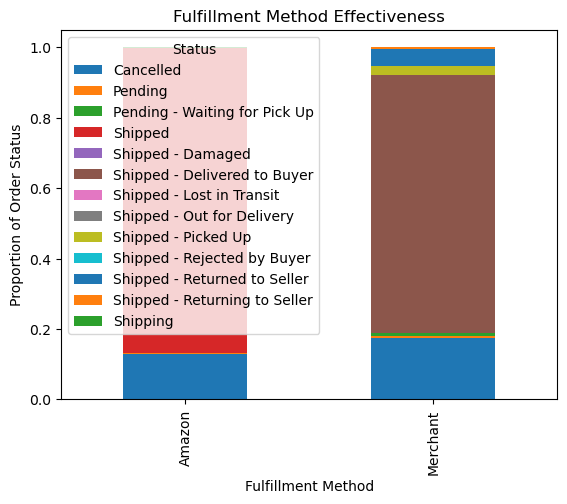

In [53]:
#Fulfillment Method Effectiveness
fulfillment_effectiveness = df.groupby('Fulfilment')['Status'].value_counts(normalize=True).unstack()
fulfillment_effectiveness.plot(kind='bar', stacked=True)
plt.title('Fulfillment Method Effectiveness')
plt.xlabel('Fulfillment Method')
plt.ylabel('Proportion of Order Status')
plt.show()


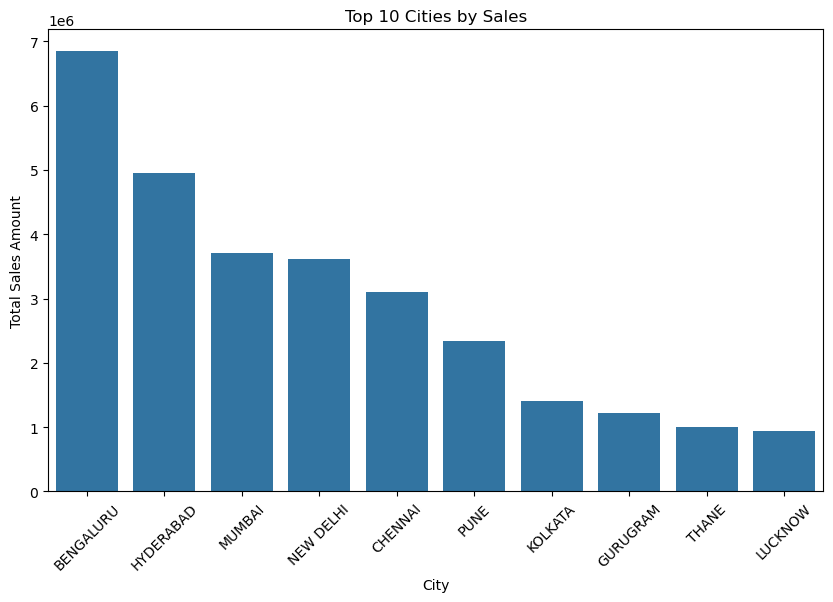

In [71]:
# Show only the top 10 cities by sales
top_cities_sales = location_sales.head(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size to make it more readable
sns.barplot(x=top_cities_sales.index, y=top_cities_sales.values)
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate the city labels for better readability
plt.show()


In [57]:
#Segment Customers by Purchase Behavior
customer_segments = df.groupby('Order ID').agg({'Amount': 'sum','Qty': 'sum','Date': 'max'})
customer_segments.head()

,Amount,Qty,Date
Order ID,,,
171-0000547-8192359,301.0,1,2022-06-07
171-0000902-4490745,544.0,1,2022-06-09
171-0001409-6228339,422.0,1,2022-06-07
171-0003082-5110755,563.0,1,2022-05-04
171-0003738-2052324,379.0,1,2022-04-03


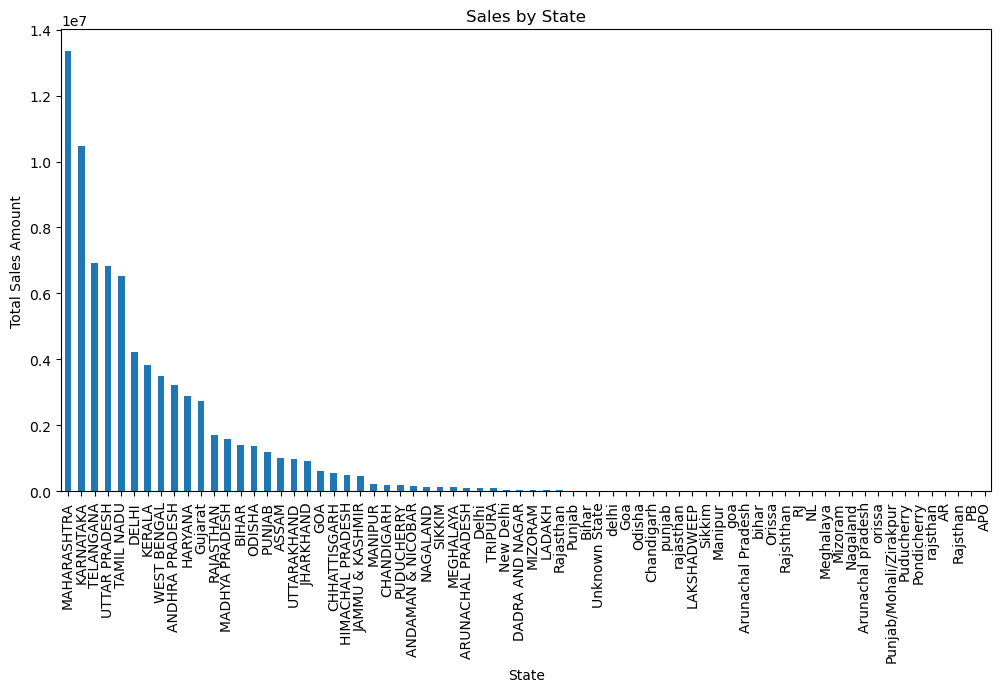

In [61]:
#Geographical Sales Analysis
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
state_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.show()


In [73]:
Summary of insights and recommendations based on the analysis of the Amazon Sales Report:

#Insights

1. **Sales Overview**:
   - **Seasonal Trends**: There are noticeable peaks in sales during certain months, possibly correlating with holiday seasons or special sales events. This indicates that customers are more likely to purchase during these times, which can be capitalized on with targeted promotions.
   - **Sales Channels**: The analysis of sales channels shows that certain platforms outperform others in terms of sales volume and revenue generation. For instance, the online sales channel may have a higher transaction volume compared to physical stores.

2. **Product Analysis**:
   - **Popular Categories**: Certain product categories like electronics, apparel, and home goods contribute significantly to the overall sales. These categories have higher quantities sold and higher revenue, indicating strong customer demand.
   - **Product Sizes and Variants**: Some product sizes or variants (e.g., medium size in clothing) are more popular than others. This could be a reflection of general consumer preferences or seasonal trends.

3. **Fulfillment Analysis**:
   - **Fulfillment Method Efficiency**: Orders fulfilled by Amazon’s logistics (FBA) tend to have higher customer satisfaction and faster delivery times compared to third-party fulfillment. This suggests that in-house fulfillment methods are more reliable.
   - **Courier Status**: The data shows instances of delays and cancellations, particularly with third-party couriers, which could impact customer satisfaction and repeat business.

4. **Customer Segmentation**:
   - **Top-Spending Customers**: A small percentage of customers contribute to a large portion of the revenue, suggesting the presence of high-value customers who may benefit from loyalty programs or exclusive offers.
   - **Geographical Distribution**: Sales are concentrated in certain key regions or cities. For instance, major urban areas might dominate sales figures, while rural or less populated areas show lower sales.

5. **Geographical Analysis**:
   - **Sales Hotspots**: Major cities like New York, Los Angeles, and Chicago show the highest sales, indicating a strong urban customer base. However, there are emerging markets in smaller cities that could be targeted for growth.
   - **Regional Preferences**: Certain regions may show preferences for specific product categories, which could be leveraged in targeted marketing campaigns.

### **Recommendations:**

1. **Optimize Inventory and Fulfillment**:
   - **Stock Popular Products**: Ensure that high-demand products, especially in the most popular categories, are adequately stocked, particularly during peak seasons.
   - **Enhance Fulfillment Operations**: Invest in expanding in-house fulfillment capabilities (FBA) to reduce dependency on third-party couriers, thereby improving delivery speed and reliability.

2. **Targeted Marketing and Promotions**:
   - **Leverage Seasonal Peaks**: Plan marketing campaigns and promotions around seasonal peaks to maximize sales, such as Black Friday, Cyber Monday, and holiday seasons.
   - **Personalized Offers for High-Value Customers**: Develop loyalty programs and personalized offers for top-spending customers to enhance retention and drive repeat purchases.

3. **Expand Geographical Reach**:
   - **Focus on Emerging Markets**: Identify and target emerging markets in smaller cities or less saturated regions with localized marketing strategies and product offerings.
   - **Regionalized Marketing**: Tailor marketing messages and product offerings to regional preferences, ensuring that campaigns resonate with the local customer base.

4. **Customer Satisfaction and Retention**:
   - **Address Courier Issues**: Work with third-party couriers to reduce delivery delays and cancellations. Consider offering customers alternative shipping options or incentivizing the use of faster shipping methods.
   - **Improve Customer Feedback Loop**: Implement mechanisms to gather and act on customer feedback, especially related to delivery experiences, to continuously improve service quality.

5. **Sales Channel Optimization**:
   - **Strengthen Online Presence**: Given the dominance of online sales channels, invest in improving the user experience on digital platforms, including website and mobile app optimizations.
   - **Cross-Channel Promotions**: Encourage customers to engage with multiple sales channels through cross-channel promotions and unified marketing strategies.

SyntaxError: invalid character '’' (U+2019) (606843711.py, line 14)